# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Agi Fransdana
- **Email:** agif270602@gmail.com
- **ID Dicoding:** agi_fransdana_HCmZ

## Pertanyaan bisnis
1. Pengaruh Cuaca terhadap Penyewaan Sepeda

Pertanyaan: "Bagaimana pengaruh kondisi cuaca (suhu, kelembapan, kecepatan angin) terhadap jumlah penyewaan sepeda di hari kerja dan hari libur dalam periode satu tahun?"

2. Pola Penyewaan Sepeda Berdasarkan Jam

Pertanyaan: "Bagaimana pola penyewaan sepeda berdasarkan jam dalam periode satu tahun, dan jam berapa yang menunjukkan puncak penyewaan?"


## Import Semua Packages/Library yang digunakan

import library yang diperlukan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Wrangling

### Gathering Data

In [2]:
day = pd.read_csv("day.csv")
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Dari data diatas terlihat 16 Variabel dengan jumlah sebanyak 731

In [3]:
hour = pd.read_csv("hour.csv")
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


dari data diatas terlihat 17 Variabel dengan jumlah sebanyak 17379

### Assessing Data

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


dari hasil diatas, dapat dilihat bahwa:

Kolom bertipe object:
dteday

kolom bertipe int64:
instant, season, yr, mnth, holiday, weekday, workingday, weathersit, casual, registered, cnt.

float64:
temp, atemp, hum, windspeed.

In [5]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


dari hasil diatas, dapat dilihat bahwa:

Kolom bertipe object: dteday

kolom bertipe int64: instant, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, casual, registered, cnt

float64: temp, atemp, hum, windspeed.

In [6]:
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Kode diatas digunakan untuk mengecek apakah ada data kosong (missing value) di dataset day.

In [7]:
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Kode diatas digunakan untuk mengecek apakah ada data kosong (missing value) di dataset hour.

In [8]:
day.duplicated().sum()

0

tidak ada data yang duplikat dalam dataset day.

In [9]:
hour.duplicated().sum()

0

tidak ada data yang duplikat dalam dataset hour.

In [10]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


menampilkan statistik deskriptif untuk dataset day, seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), nilai maksimum (max), serta persentil (25%, 50%, 75&). dataset day ini bersih, tanpa nilai duplikat atau nilai kosong. dan siap untuk dianalisis lebih lanjut untuk menjawab pertanyaan bisnis.

In [11]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


menampilkan statistik deskriptif untuk dataset day, seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), nilai maksimum (max), serta persentil (25%, 50%, 75&). dataset hour juga sama seperti dataset day bersih, tanpa nilai duplikat atau nilai kosong. dan siap untuk dianalisis lebih lanjut untuk menjawab pertanyaan bisnis.

In [12]:
day["dteday"] = pd.to_datetime(day["dteday"])
hour["dteday"] = pd.to_datetime(hour["dteday"])

kode diatas mengubah data ke tipe data datetime yang sebelumnya bertipe object.

In [13]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

hasilnya tipe data kolom dteday pada dataset day berubah menjadi tipe datatime

In [14]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

hasilnya tipe data kolom dteday pada dataset hour berubah menjadi tipe datatime

## Exploratory Data Analysis (EDA)

### Explore ...


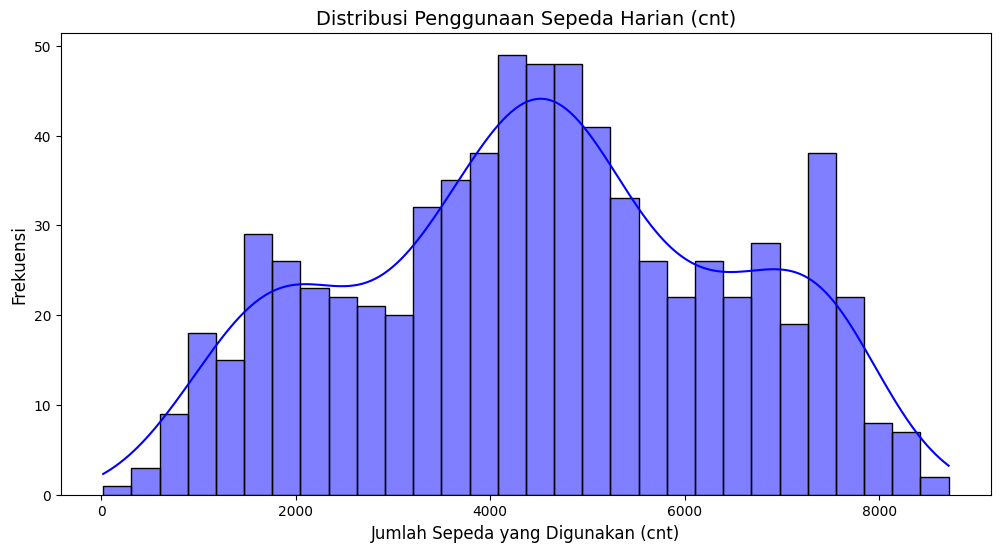

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(day['cnt'], kde=True, color='blue', bins=30)
plt.title('Distribusi Penggunaan Sepeda Harian (cnt)', fontsize=14)
plt.xlabel('Jumlah Sepeda yang Digunakan (cnt)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

tampilan grafik diatas adalah histogram distribusi penggunaan sepeda harian (kolom cnt) dengan kurva KDE (Kernel Density Estimation) untuk menunjukkan pola distribusi data.

Sumbu X (Jumlah sepeda yang digunakan)
Sumbu Y (Frekuensi (menampilakan jumlah hari dimana penyewaan sepede berada dalam rentang tertentu)).

sebagian besar hari memiliki jumlah penyewaan sepeda disekitar nilai rata-rata 4000 - 6000. distribusi ini menunjukan bahwa jumlah penyewaan sepeda cenderung stabil, dengan sedikit hari di mana penggunaan sangat rendah atau sangat tinggi.

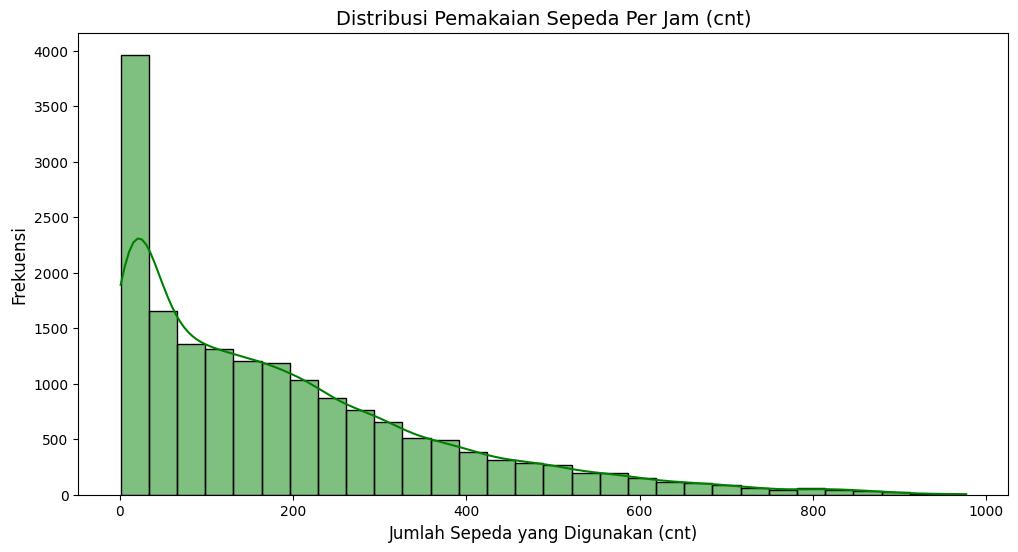

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(hour['cnt'], kde=True, color='green', bins=30)
plt.title('Distribusi Pemakaian Sepeda Per Jam (cnt)', fontsize=14)
plt.xlabel('Jumlah Sepeda yang Digunakan (cnt)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

interpretasi grafik

distribusi : data cnt menunjukkan jumlah penyewaan sepeda per jam. sebagian besar penyewaan sepeda terjadi pada jumlah rendah (kuran dari 200 sepeda per jam). Hal ini ditunjukkan oleh frekuensi tinggi diawal histogram. jadi distribusi cenderung menurun saat jumlah penyewaan meningkat, dengan jumlah penyewaan tinggi menjadi lebih jarang.

In [17]:
categorical_columns_day = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns_day:
    print(f"\nDistribusi {col}:")
    print(day[col].value_counts())

categorical_columns_hour = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns_hour:
    print(f"\nDistribusi {col}:")
    print(hour[col].value_counts())


Distribusi season:
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

Distribusi yr:
yr
1    366
0    365
Name: count, dtype: int64

Distribusi mnth:
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64

Distribusi holiday:
holiday
0    710
1     21
Name: count, dtype: int64

Distribusi weekday:
weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

Distribusi workingday:
workingday
1    500
0    231
Name: count, dtype: int64

Distribusi weathersit:
weathersit
1    463
2    247
3     21
Name: count, dtype: int64

Distribusi season:
season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

Distribusi yr:
yr
1    8734
0    8645
Name: count, dtype: int64

Distribusi mnth:
mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: 

Dataset day: Fokus pada analisis harian, menunjukkan distribusi variabel lebih stabil secara umum.

Dataset hour: Memberikan wawasan lebih rinci, misalnya pola aktivitas dijam-jam tertentu (jam sibuk seperti pukul 17.00 menonjol).

kode dibawah ini untuk memvisualisasikan distribusi kolom numerik dalam dataset day dan hour menggunakan histogram. tujuannya adalah untuk memahami sebaran data numerik, seperti suhu, kelembapan, kecepatan angin, dan jumlah penyewaan sepeda baik data harian maupun per jam.

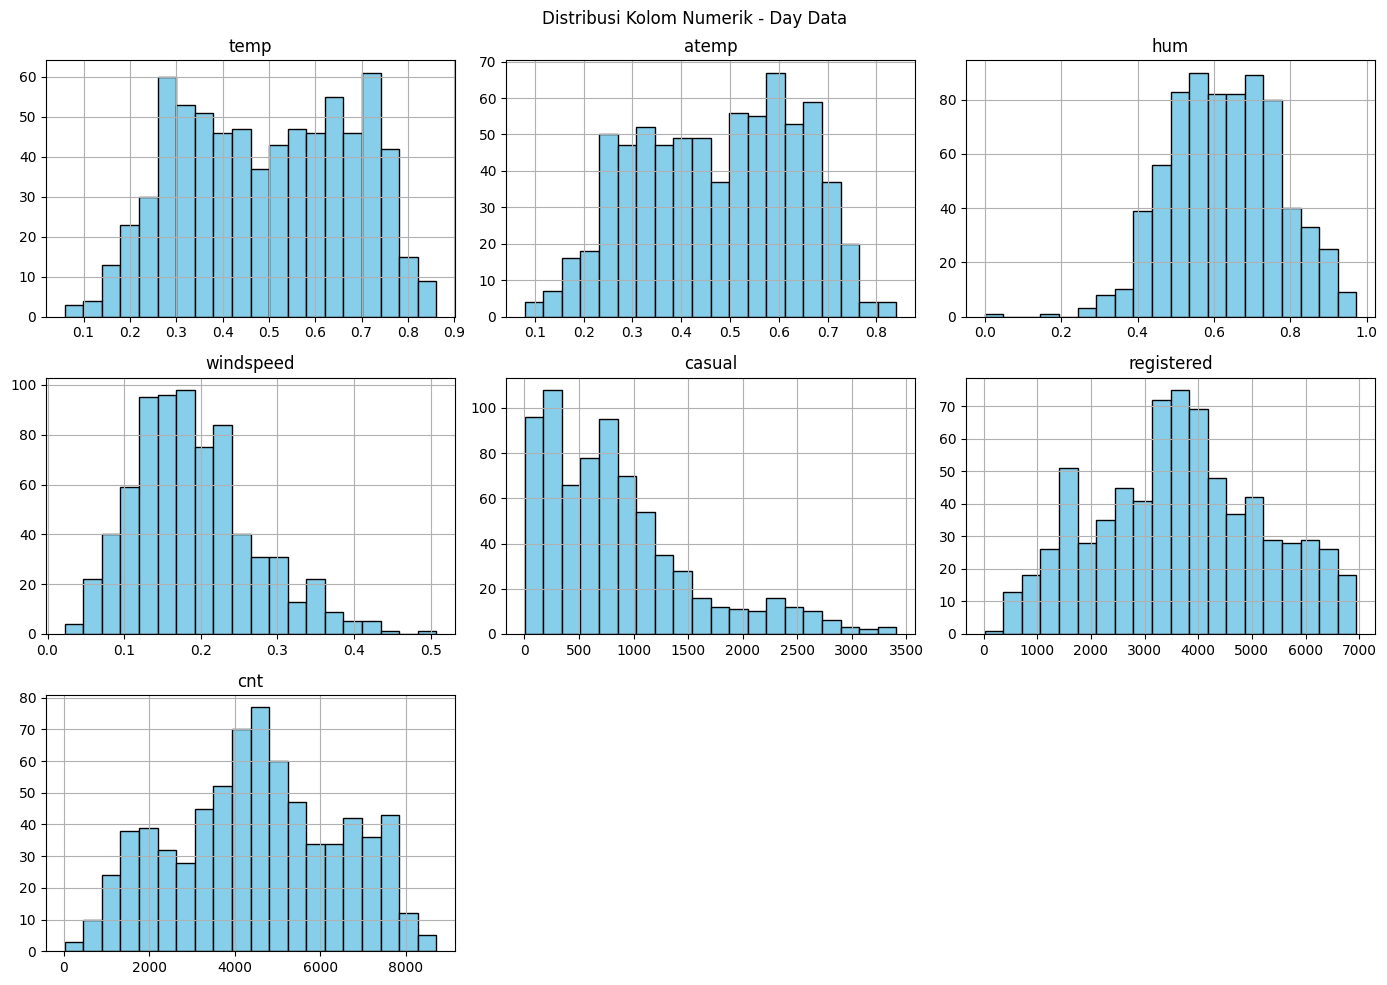

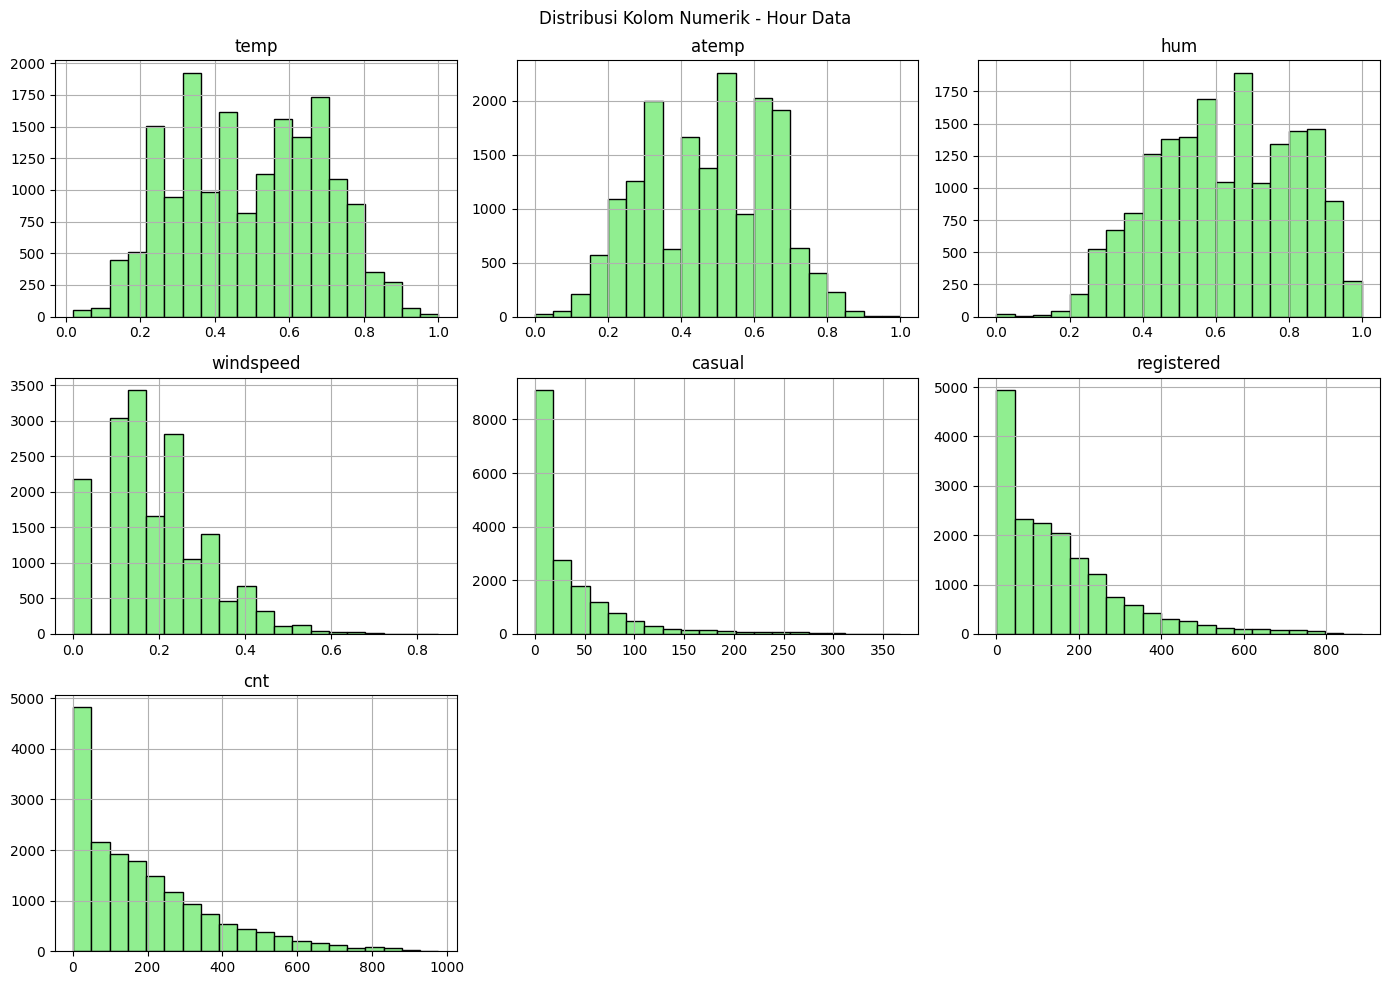

In [18]:
numerical_columns_day = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
day[numerical_columns_day].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Kolom Numerik - Day Data")
plt.tight_layout()
plt.show()

numerical_columns_hour = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
hour[numerical_columns_hour].hist(bins=20, figsize=(14, 10), color='lightgreen', edgecolor='black')
plt.suptitle("Distribusi Kolom Numerik - Hour Data")
plt.tight_layout()
plt.show()

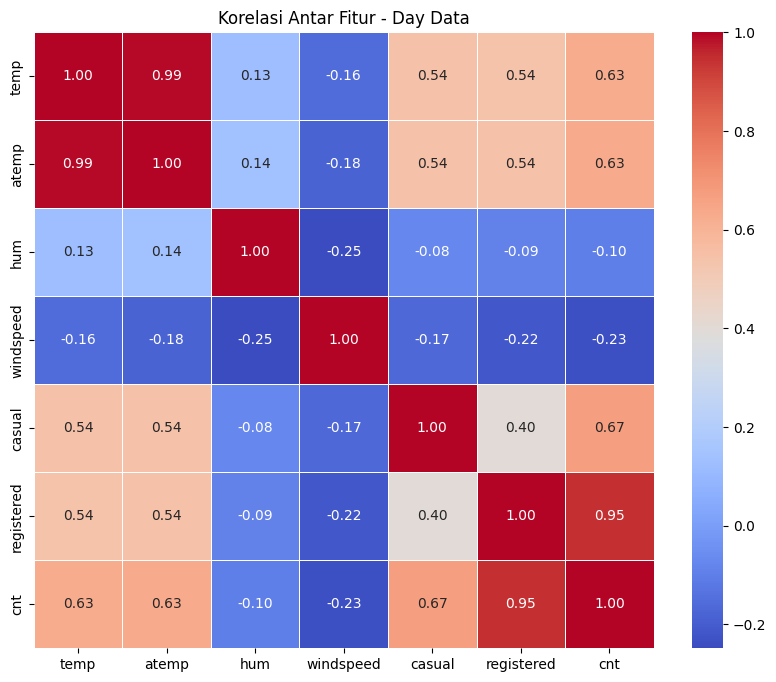

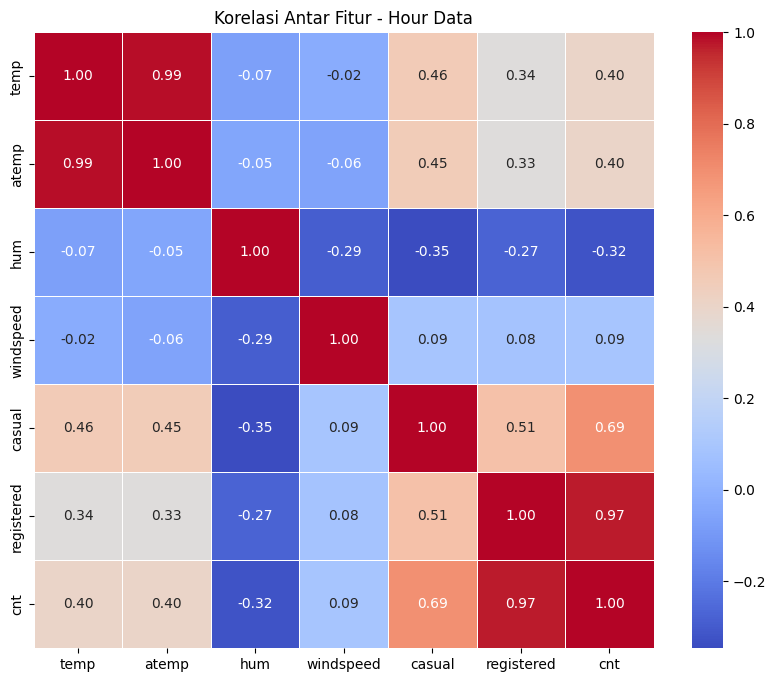

In [19]:
corr_day = day[numerical_columns_day].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_day, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur - Day Data')
plt.show()

corr_hour = hour[numerical_columns_hour].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_hour, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur - Hour Data')
plt.show()

kode di atas mengambil data numerik dari dataset day dan hour berdasarkan kolom yang didefinisikan di numerical_columns dan .corr() menghitung matriks korelasi antara semua kolom numerik. korelasi mengukur hubungan linear antara dua variabel, dengan nilai antara -1 (hubungan negatif kuat) hingga 1 (hubungan positif kuat).

kode dibawah ini untuk menganalisis tren penyewaan sepeda berdasarkan tanggal dalam dataset day. tujuannya adalah untuk melihat fluktuassi jumlah penyewaan sepeda per hari, memungkinkan kita untuk mengidentifikasi tren musiman atau pola lainnya dalam periode waktu tertentu.

In [20]:
day_grouped = day.groupby('dteday')['cnt'].sum().reset_index()
fig_day_trend = px.line(day_grouped, x='dteday', y='cnt', title="Tren Penyewaan Sepeda per Hari",
                        labels={'dteday': 'Tanggal', 'cnt': 'Jumlah Penyewaan'})
fig_day_trend.update_xaxes(rangeslider_visible=True)
fig_day_trend.show()

kode dibawah ini untuk memvisualisasikan pengaruh suhu terhadap jumlah penyewaan sepeda menggunakan grafik sebar (scatter plot). Tujuannya adalah untuk melihat bagaimana suhu mempengaruhi jumlah penyewaan sepeda, dengan mempertimbangkan kondisi cuaca (weathersit) yang berbeda

In [21]:
fig_temp_vs_cnt = px.scatter(day, x='temp', y='cnt', color='weathersit', title="Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda",
                             labels={'temp': 'Suhu', 'cnt': 'Jumlah Penyewaan'})
fig_temp_vs_cnt.show()

kode dibawah ini untuk membuat boxplot yang menggambarkan distribusi jumlah penyewaan sepeda berdasarkan musim. Tujuan utamanya adalah untuk menganalisis bagaimana musim memengaruhi penyewaan sepeda.

In [22]:
fig_season_boxplot = px.box(day, x='season', y='cnt', title="Penyewaan Sepeda Berdasarkan Musim",
                            labels={'season': 'Musim', 'cnt': 'Jumlah Penyewaan'})
fig_season_boxplot.show()

kode dibawah ini untuk membuat boxplot yang menggambarkan distribusi jumlah penyewaan sepeda berdasarkan  jenis hari (libur vs tidak). Tujuan utamanya adalah untuk menganalisis bagaimana jenis hari memengaruhi penyewaan sepeda.

In [23]:
fig_holiday_boxplot = px.box(day, x='holiday', y='cnt', title="Penyewaan Sepeda Berdasarkan Jenis Hari (Libur vs Tidak)",
                              labels={'holiday': 'Jenis Hari', 'cnt': 'Jumlah Penyewaan'})
fig_holiday_boxplot.show()

## Visualization & Explanatory Analysis


### 1. Pengaruh Cuaca terhadap Penyewaan Sepeda Pertanyaan: "Bagaimana pengaruh kondisi cuaca (suhu, kelembapan, kecepatan angin) terhadap jumlah penyewaan sepeda di hari kerja dan hari libur dalam periode satu tahun?"

kode di bawah untuk menganalisis pengaruh cuaca (suhu, kelembapan, kecepatan angin) terhadap jumlah penyewaan sepeda pada hari kerja dan hari libur, kode yang diberikan menghasilkan beberapa scatter plot yang memvisualisasikan hubungan antara variabel-variabel tersebut.

In [24]:
day_workingday = day[day['workingday'] == 1]
day_holiday = day[day['workingday'] == 0]

fig_temp_workingday = px.scatter(day_workingday, x='temp', y='cnt',
                                  title="Pengaruh Suhu terhadap Penyewaan Sepeda (Hari Kerja)",
                                  labels={'temp': 'Suhu', 'cnt': 'Jumlah Penyewaan'})
fig_temp_holiday = px.scatter(day_holiday, x='temp', y='cnt',
                               title="Pengaruh Suhu terhadap Penyewaan Sepeda (Hari Libur)",
                               labels={'temp': 'Suhu', 'cnt': 'Jumlah Penyewaan'})

fig_hum_workingday = px.scatter(day_workingday, x='hum', y='cnt',
                                 title="Pengaruh Kelembapan terhadap Penyewaan Sepeda (Hari Kerja)",
                                 labels={'hum': 'Kelembapan', 'cnt': 'Jumlah Penyewaan'})
fig_hum_holiday = px.scatter(day_holiday, x='hum', y='cnt',
                              title="Pengaruh Kelembapan terhadap Penyewaan Sepeda (Hari Libur)",
                              labels={'hum': 'Kelembapan', 'cnt': 'Jumlah Penyewaan'})

fig_wind_workingday = px.scatter(day_workingday, x='windspeed', y='cnt',
                                  title="Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda (Hari Kerja)",
                                  labels={'windspeed': 'Kecepatan Angin', 'cnt': 'Jumlah Penyewaan'})
fig_wind_holiday = px.scatter(day_holiday, x='windspeed', y='cnt',
                               title="Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda (Hari Libur)",
                               labels={'windspeed': 'Kecepatan Angin', 'cnt': 'Jumlah Penyewaan'})

fig_temp_workingday.show()
fig_temp_holiday.show()
fig_hum_workingday.show()
fig_hum_holiday.show()
fig_wind_workingday.show()
fig_wind_holiday.show()

Hasil Analisis:

Hari Kerja: Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda. Artinya, ketika suhu meningkat, jumlah penyewaan sepeda cenderung meningkat juga. Hal ini bisa menunjukkan bahwa orang lebih suka bersepeda ketika cuaca lebih hangat di hari kerja.

Hari Libur: Pada hari libur, pola yang sama mungkin juga terlihat, tetapi dengan lebih banyak fluktuasi. Hal ini bisa disebabkan oleh lebih banyak faktor seperti tujuan bersepeda yang beragam pada hari libur. Penyewaan sepeda pada hari libur lebih dipengaruhi oleh faktor sosial dan rekreasi dibandingkan dengan hari kerja.


Hari Kerja: Kelembapan 0.970 (tinggi): Penyewaan sepeda menurun karena kelembapan tinggi membuat orang merasa tidak nyaman bersepeda, terutama karena keringat dan rasa panas. dan Kelembapan 0 (rendah): Penyewaan sepeda tetap sedikit meskipun kelembapan rendah, kemungkinan karena suhu yang sangat tinggi atau faktor lain yang membuat orang enggan bersepeda.

Hari Libur: Pada hari libur, pola yang lebih tidak teratur mungkin terlihat. Meskipun kelembapan lebih tinggi, orang mungkin tetap bersepeda jika mereka berencana untuk berwisata atau bersenang-senang. Sebaliknya, pada suhu yang sangat tinggi atau kelembapan yang tinggi, beberapa orang mungkin menghindari bersepeda karena ketidaknyamanan.


Hari Kerja: Tidak ada korelasi yang signifikan antara kecepatan angin dan jumlah penyewaan sepeda pada hari kerja. Ini menunjukkan bahwa orang mungkin tetap bersepeda meskipun ada kecepatan angin tertentu, karena faktor utama yang memengaruhi keputusan mereka adalah kebutuhan akan transportasi atau pekerjaan.

Hari Libur: Pada hari libur, pengaruh angin terhadap jumlah penyewaan mungkin lebih terlihat. Kecepatan angin yang tinggi dapat menyebabkan orang enggan untuk bersepeda karena ketidaknyamanan atau potensi bahaya. Namun, ketika angin rendah, penyewaan sepeda mungkin lebih tinggi karena cuaca lebih menyenangkan.

### 2. Pola Penyewaan Sepeda Berdasarkan Jam
Pertanyaan: "Bagaimana pola penyewaan sepeda berdasarkan jam dalam periode satu tahun, dan jam berapa yang menunjukkan puncak penyewaan?"

In [25]:
hour_grouped = hour.groupby('hr')['cnt'].sum().reset_index()
fig_hour_trend = px.line(hour_grouped, x='hr', y='cnt', title="Pola Penyewaan Sepeda Berdasarkan Jam",
                         labels={'hr': 'Jam', 'cnt': 'Jumlah Penyewaan'})
fig_hour_trend.update_xaxes(tickmode='linear')
fig_hour_trend.show()

peak_hour = hour_grouped[hour_grouped['cnt'] == hour_grouped['cnt'].max()]
print(f"Jam puncak penyewaan sepeda: jam {peak_hour['hr'].values[0]} dengan {peak_hour['cnt'].values[0]} penyewaan.")

Jam puncak penyewaan sepeda: jam 17 dengan 336860 penyewaan.


Puncak penyewaan sepeda paling tinggi pada jam 17 dengan 336860

## Analisis lanjutan

In [26]:
latest_date = day['dteday'].max()
day['recency'] = (latest_date - day['dteday']).dt.days

season_freq = day.groupby("season")['cnt'].sum().reset_index()
season_freq['season_name'] = season_freq['season'].map({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})

# Calculate Monetary
monetary = day.groupby("yr")['cnt'].sum().reset_index()
monetary['year'] = monetary['yr'].map({0: "2011", 1: "2012"})

# Recency Visualization
fig_recency = px.histogram(
    day,
    x='recency',
    nbins=30,
    title="Distribusi Recency",
    labels={"recency": "Days Since Last Rental", "count": "Frequency"},
    color_discrete_sequence=["#636EFA"]
)
fig_recency.show()

# Frequency Visualization
fig_frequency = px.bar(
    season_freq,
    x='season_name',
    y='cnt',
    title="Penyewaan Berdasarkan Musim",
    labels={"season_name": "Season", "cnt": "Total Rentals"},
    color='cnt',
    color_continuous_scale='Viridis'
)
fig_frequency.show()

# Monetary Visualization
fig_monetary = px.bar(
    monetary,
    x='year',
    y='cnt',
    title="Total Penyewaan per Tahun",
    labels={"year": "Year", "cnt": "Total Rentals"},
    color='cnt',
    color_continuous_scale='Cividis'
)
fig_monetary.show()

1. RFM Analysis:

Recency:

Berdasarkan data Recency, terlihat bahwa ada dua rentang waktu yang cukup berbeda untuk penyewaan sepeda terakhir:
0-699 hari: Di rentang ini, ada 50 penyewaan yang terjadi, yang menunjukkan bahwa sebagian besar pelanggan telah menyewa sepeda dalam waktu yang relatif baru, dengan aktivitas yang cukup tinggi.
700-749 hari: Pada rentang ini, jumlah penyewaan turun menjadi 31. Ini menunjukkan bahwa pelanggan yang menyewa setelah 700 hari cenderung lebih sedikit, yang bisa jadi mencerminkan penurunan minat atau ketertarikan terhadap layanan sepeda seiring berjalannya waktu.

Insight:

Mayoritas pengguna memiliki perilaku yang lebih sering menyewa sepeda dalam jangka waktu yang lebih dekat. Hal ini menunjukkan bahwa sebagian besar pengguna aktif dan mungkin lebih memilih penyewaan yang konsisten dalam periode waktu tertentu.
Pengelola layanan penyewaan dapat menggunakan informasi ini untuk menargetkan pelanggan dengan retensi rendah dengan menawarkan promo atau diskon untuk menarik mereka kembali menggunakan layanan sepeda.

Frequency:

Berdasarkan analisis Frequency atau frekuensi penyewaan berdasarkan musim:
Spring (Musim Semi): 471,348 total penyewaan, menunjukkan bahwa meskipun cuaca bisa sedikit lebih dingin, permintaan tetap ada.
Summer (Musim Panas): Penyewaan meningkat menjadi 918,589, yang menunjukkan bahwa suhu yang lebih hangat mendorong orang lebih banyak menggunakan sepeda.
Fall (Musim Gugur): Menunjukkan 1,061,129 total penyewaan, tertinggi di antara musim-musim lainnya. Ini menunjukkan bahwa cuaca yang nyaman selama musim gugur mendorong orang lebih aktif bersepeda.
Winter (Musim Dingin): 841,613 total penyewaan. Meskipun suhu lebih rendah, masih ada permintaan yang signifikan untuk sepeda, mungkin dari pengguna yang menggunakannya untuk keperluan transportasi.

Insight:

Musim Gugur dan Musim Panas adalah musim dengan permintaan tertinggi, yang berarti bahwa penyewaan sepeda cenderung lebih tinggi selama cuaca yang nyaman.
Pengelola dapat memaksimalkan peluang dengan menawarkan promosi lebih banyak di Musim Gugur dan Musim Panas, karena musim-musim tersebut menunjukkan tingkat penyewaan yang lebih tinggi. Sementara untuk Winter, meskipun permintaannya lebih rendah, masih cukup besar dan dapat dioptimalkan dengan menyediakan fasilitas yang lebih cocok untuk cuaca dingin, seperti sepeda listrik atau pelindung hujan.

Monetary:

Berdasarkan data Monetary atau total penyewaan per tahun:
Pada 2011, total penyewaan adalah 1,243,103.
Pada 2012, terjadi peningkatan signifikan menjadi 2,049,576.

Insight:

Terdapat peningkatan yang signifikan dalam penyewaan sepeda dari 2011 ke 2012, yang dapat menunjukkan bahwa kesadaran masyarakat tentang layanan sepeda semakin tinggi.
Pengelola dapat memanfaatkan pertumbuhan ini dengan mengembangkan lebih banyak stasiun penyewaan atau sepeda untuk memenuhi permintaan yang meningkat, serta meningkatkan program promosi yang dapat menarik lebih banyak pelanggan.

In [27]:
day['day_name'] = day['weekday'].map({
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
})

geo_analysis = day.groupby(['workingday', 'day_name']).agg({
    'cnt': 'mean'
}).reset_index()

geo_analysis['workingday_label'] = geo_analysis['workingday'].map({
    0: "Weekend/Holiday",
    1: "Working Day"
})

fig = px.bar(
    geo_analysis, x="day_name", y="cnt", color="workingday_label",
    title="Pola Penyewaan Sepeda Berdasarkan Hari Kerja dan Akhir Pekan",
    labels={"cnt": "Average Rentals", "day_name": "Day of the Week", "workingday_label": "Day Type"},
    barmode="group",
    color_discrete_map={"Working Day": "blue", "Weekend/Holiday": "orange"}
)

fig.show()

Berdasarkan analisis Geospatial yang mengelompokkan penyewaan berdasarkan hari kerja dan akhir pekan (holiday):

Friday (Jumat):

Holiday average rentals: 3,247
Working day average rentals: 4,718.588

Insight:

Jumat menunjukkan perbedaan yang cukup signifikan antara hari libur dan hari kerja. Pada hari libur, jumlah penyewaan sepeda sedikit lebih rendah, namun saat hari kerja (terutama untuk mereka yang bekerja), angka penyewaan jauh lebih tinggi, mungkin karena lebih banyak orang yang menggunakan sepeda sebagai moda transportasi untuk bekerja.

Monday (Senin):

Holiday average rentals: 3,973.667
Working day average rentals: 4,398.867

Insight:

Pada Senin, meskipun ada sedikit peningkatan jumlah penyewaan pada hari kerja dibandingkan dengan hari libur, selisihnya tidak terlalu besar, menunjukkan bahwa orang mungkin tetap memilih sepeda untuk keperluan pribadi atau transportasi meskipun pada hari pertama kerja dalam seminggu.

Saturday (Sabtu):

Holiday average rentals: 4,550.543

Insight:

Sabtu memiliki angka penyewaan yang relatif tinggi, meskipun tidak dibedakan berdasarkan hari kerja atau libur. Ini mungkin menunjukkan bahwa banyak orang menggunakan sepeda untuk kegiatan rekreasi pada akhir pekan.

Sunday (Minggu):

Holiday average rentals: 4,228.829

Insight:

Seperti pada Sabtu, Minggu menunjukkan angka penyewaan yang tinggi, yang dapat diasumsikan bahwa pengguna menggunakan sepeda untuk aktivitas santai di akhir pekan.

Thursday (Kamis):

Holiday average rentals: 1,960
Working day average rentals: 4,720.343

Insight:

Pada Kamis, terdapat peningkatan yang signifikan pada hari kerja dibandingkan dengan hari libur, yang menunjukkan bahwa lebih banyak orang menggunakan sepeda untuk keperluan sehari-hari mereka (misalnya bekerja).

Tuesday (Selasa):

Holiday average rentals: 1,013
Working day average rentals: 4,544.621

Insight:

Selasa menunjukkan perbedaan yang cukup besar antara hari kerja dan hari libur. Pada hari kerja, rata-rata penyewaan lebih tinggi, menunjukkan bahwa sepeda digunakan untuk aktivitas rutin pada hari kerja.

Wednesday (Rabu):

Holiday average rentals: 7,403
Working day average rentals: 4,520.825

Insight:

Rabu memiliki angka penyewaan yang sangat tinggi pada hari libur, yang mungkin menunjukkan bahwa orang lebih suka menggunakan sepeda untuk aktivitas luar ruangan atau rekreasi. Pada hari kerja, meskipun ada penyewaan, jumlahnya sedikit lebih rendah.

In [28]:
weather_groups = day.groupby("weathersit")['cnt'].mean().reset_index()
weather_groups['weather'] = weather_groups['weathersit'].map({
    1: "Cerah/Berawan",
    2: "Berkabut",
    3: "Salju Ringan/Hujan"
})

fig_weather = px.bar(
    weather_groups,
    x='weather',
    y='cnt',
    title="Rata-rata Penyewaan Berdasarkan Cuaca",
    labels={"weather": "Kondisi Cuaca", "cnt": "Penyewaan Rata-Rata"},
    color='cnt',
    color_continuous_scale='Turbo'
)

fig_weather.show()

bins = [0, 0.3, 0.6, 0.9, 1.0]
labels = ["Low Temp", "Moderate Temp", "High Temp", "Very High Temp"]
day['temp_bin'] = pd.cut(day['temp'], bins=bins, labels=labels)

fig_temp_bin = px.histogram(
    day,
    x='temp_bin',
    y='cnt',
    histfunc='avg',
    title="Penyewaan Berdasarkan Kategori Suhu",
    labels={"temp_bin": "Kategori Suhu", "cnt": "Penyewaan Rata-Rata"},
    color='temp_bin',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig_temp_bin.show()

Berdasarkan hasil clustering:

1. Penyewaan Berdasarkan Kondisi Cuaca:

Cuaca Cerah/Berawan: Rata-rata penyewaan di kondisi cuaca ini adalah sekitar 4,876. Angka ini menunjukkan bahwa kondisi cuaca cerah atau berawan memberikan tingkat penyewaan sepeda yang tinggi. Orang cenderung lebih memilih untuk menyewa sepeda pada hari-hari yang cerah dan berawan, karena aktivitas di luar ruangan lebih menarik saat cuaca nyaman.

Cuaca Berkabut: Rata-rata penyewaan pada cuaca berkabut adalah sekitar 4,036. Meskipun sedikit lebih rendah dari cuaca cerah, angka ini masih cukup tinggi, menunjukkan bahwa orang tetap memilih untuk bersepeda meskipun ada kabut. Namun, cuaca yang berkabut mungkin sedikit mengurangi kenyamanan dan visibilitas, yang berpotensi menurunkan jumlah penyewaan sedikit.

Cuaca Salju Ringan/Hujan: Rata-rata penyewaan pada cuaca salju ringan atau hujan adalah 1,803. Penyewaan sepeda jauh lebih rendah pada kondisi cuaca ini, yang masuk akal karena hujan atau salju dapat mengganggu kenyamanan berkendara. Pengguna sepeda biasanya akan lebih enggan untuk menyewa sepeda ketika cuaca buruk, seperti hujan lebat atau salju.

2. Penyewaan Berdasarkan Kategori Suhu:

Moderate Temp (Suhu Sedang): Rata-rata penyewaan pada kategori suhu sedang adalah 4,488. Ini adalah kategori suhu yang paling tinggi dalam hal penyewaan sepeda. Suhu yang sedang (tidak terlalu panas atau dingin) menciptakan kondisi yang ideal untuk bersepeda, karena orang merasa nyaman beraktivitas di luar ruangan dalam suhu tersebut.

Low Temp (Suhu Rendah): Rata-rata penyewaan pada suhu rendah adalah 2,381. Penyewaan sepeda cenderung menurun pada suhu yang lebih rendah. Pada suhu rendah, orang lebih cenderung menghindari bersepeda karena rasa dingin, terutama jika mereka harus bersepeda dalam cuaca yang lebih ekstrem (misalnya di musim dingin).

High Temp (Suhu Tinggi): Rata-rata penyewaan pada suhu tinggi adalah 5,654. Ini menunjukkan bahwa meskipun suhu tinggi bisa mengurangi kenyamanan bersepeda, tingkat penyewaan sepeda justru lebih tinggi pada suhu tinggi. Hal ini bisa terjadi karena orang lebih cenderung memilih sepeda sebagai pilihan transportasi yang efisien dan bebas macet, terutama di area perkotaan yang ramai dan pada cuaca yang panas.


Insight:
Cuaca Cerah/Berawan memberikan peningkatan penyewaan sepeda yang signifikan. Orang cenderung lebih suka bersepeda pada hari yang cerah karena suhu yang nyaman dan cuaca yang mendukung untuk aktivitas fisik.

Cuaca Berkabut sedikit menurunkan minat orang untuk bersepeda, namun masih berada di level penyewaan yang cukup tinggi, menunjukkan bahwa berkabut tidak terlalu mempengaruhi banyak orang dalam memilih bersepeda sebagai pilihan transportasi atau rekreasi.

Cuaca Salju atau Hujan mengurangi penyewaan secara drastis, mengindikasikan bahwa penyewa sepeda lebih suka menghindari cuaca buruk yang mengganggu kenyamanan dan keselamatan berkendara.

Suhu Sedang adalah kondisi terbaik untuk penyewaan sepeda. Suhu yang tidak terlalu panas atau dingin memungkinkan lebih banyak orang untuk bersepeda.

Suhu Tinggi ternyata tidak menurunkan minat orang untuk menyewa sepeda. Bahkan, bisa jadi ada faktor praktis di sini, di mana sepeda menjadi pilihan transportasi yang lebih nyaman dibandingkan kendaraan lain yang mungkin lebih panas dan terjebak macet.

Suhu Rendah menyebabkan penurunan jumlah penyewaan sepeda, yang menunjukkan bahwa orang lebih memilih untuk menghindari bersepeda dalam suhu dingin yang tidak nyaman.

## Conclusion

Kesimpulan:
Penyewaan sepeda dipengaruhi oleh kondisi cuaca, dengan suhu yang lebih tinggi cenderung meningkatkan penyewaan sepeda, terutama pada hari kerja. Namun, kelembapan tinggi mengurangi minat bersepeda, baik pada hari kerja maupun libur. Pada hari libur, fluktuasi lebih tinggi karena faktor sosial dan rekreasi. Kecepatan angin tidak mempengaruhi penyewaan pada hari kerja, tetapi pada hari libur, angin kencang dapat mengurangi minat bersepeda. Jam puncak penyewaan sepeda terjadi pada jam 17:00, dengan 336,860 penyewaan, menunjukkan tren bersepeda yang lebih tinggi menjelang sore.

Berdasarkan hasil analisis RFM dan Geospatial, dapat disimpulkan bahwa penyewaan sepeda dipengaruhi oleh berbagai faktor, baik musiman, cuaca, dan waktu. Penyewaan sepeda cenderung lebih tinggi pada cuaca cerah dan suhu sedang, sementara penurunan terjadi saat suhu rendah atau cuaca buruk seperti hujan dan salju. Musim gugur dan musim panas menunjukkan angka penyewaan yang lebih tinggi dibandingkan musim lainnya. Selain itu, hari kerja seperti Jumat dan Kamis menunjukkan angka penyewaan yang lebih tinggi dibandingkan dengan hari libur.

In [29]:
pip freeze > requirements.txt